In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Local -> all other imports in source files
import settings.custom
from prophandler import PropHandler

from __utils import visualize_prop_ratio
from backup_projections import load_backup_projections

SITE = "draftkings"
MODE = "classic" # all changes have been made for "showdown" to replace "single-game"
# MODE = 'showdown'

# TOMORROW = False

BACKUP_EDITS_FILE = '../data/backup_projections.json'
# BACKUP_EDITS_FILE = [
#     '../data/historical/2025-05-14.csv',
#     '../data/historical/2025-05-18.csv'
# ]

EDITS = load_backup_projections(file=BACKUP_EDITS_FILE)

In [2]:
handler = PropHandler(
    SITE,
    MODE,
    edits=EDITS,
    # tomorrow=TOMORROW
)

In [3]:
df = handler.load(
    # Late additions to injury report
    inactive=[],
    update=True,
    sort="fpts/$",
    # sort='fpts'
    # sort='salary',
)

# First run of day (needs to update URL directory): ~6-8 minutes

   ----------------------------------------
   Beginning WebScrape of NBA Player Props.
   ----------------------------------------
Prop projection only: Taurean Prince, Khris Middleton
Player props added for: Giannis Antetokounmpo, projection went from 63.6 -> 62.62 (-----).
Player props added for: Victor Wembanyama, projection went from 52.2 -> 57.38 (+++++).
Player props added for: Cade Cunningham, projection went from 51.0 -> 55.88 (+++++).
Player props added for: Josh Giddey, projection went from 50.8 -> 49.88 (-----).
Player props added for: LaMelo Ball, projection went from 48.5 -> 48.62 (+++++).
Player props added for: Anthony Edwards, projection went from 46.7 -> 48.38 (+++++).
Player props added for: Alperen Sengun, projection went from 46.6 -> 44.88 (-----).
Player props added for: Evan Mobley, projection went from 45.2 -> 42.38 (-----).
Player props added for: Donovan Mitchell, projection went from 44.7 -> 43.88 (-----).
Player props added for: Jalen Johnson, projection wen

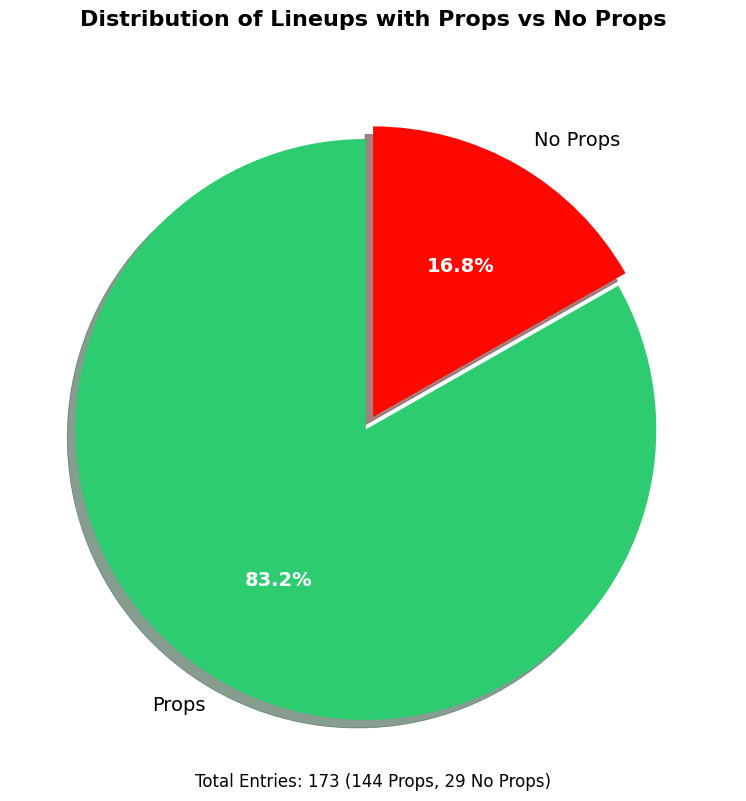

In [4]:
own_df = (pd
          .read_csv(f'/home/deegs/devel/repos/nba-boxscores-git/nba-boxscores/data/2024-2025/contest-files/{SITE}/current/current-ownership.csv')
          .set_index('name')
         )

df['own'] = df.index.map(lambda name: own_df.loc[name, 'own'] if name in own_df.index else 1)

if not df.loc[df['no-props']==1].empty:
    try:
        fig = visualize_prop_ratio(df, cutoff=0.0)
        display(fig)  # Only display once
        plt.close(fig)
    except ValueError:
        print('No props available. Using backup projections for all players.\n')

In [5]:
df

,pos,salary,team,fpts,e_fpts,fpts/$,e_fpts/$,value,no-props,own
name,,,,,,,,,,
Tyrese Martin,PG/SG,4000,BKN,24.38,12.84,6.095,3.210,4.38,0,30.0
Kel'el Ware,C,5600,MIA,34.12,18.09,6.093,3.230,6.12,0,8.0
Noah Clowney,PF/C,3900,BKN,23.62,12.56,6.056,3.221,4.12,0,18.0
Terance Mann,SF,4500,BKN,26.38,13.30,5.862,2.956,3.88,0,25.0
Isaiah Stewart,PF/C,5700,DET,32.38,15.95,5.681,2.798,3.88,0,14.0
Daniel Gafford,C,5000,DAL,28.12,14.80,5.624,2.960,3.12,0,26.0
Michael Porter,PF,7000,BKN,39.10,0.00,5.586,0.000,-35.00,1,28.0
Davion Mitchell,PG,5500,MIA,30.62,15.19,5.567,2.762,3.12,0,14.0
Nic Claxton,C,6000,BKN,33.38,16.15,5.563,2.692,3.38,0,8.0


In [6]:
# set(df.index)

In [7]:
def compare_combos(*combos):
    return {
        combo: df.loc[df.index.isin(combo), 'fpts'].sum()
        for combo in pairs
    }

In [8]:
def top_n_team_distribution(N: int, **kwargs):
    return (df
            [:N]
            .groupby('team')
            [['team']]
            .agg(['count'])
            [('team', 'count')]
            .sort_values(ascending=True)
            .plot
            .barh(
                title=f'Team distribution for top {N} projected players',
                figsize=(9,6)
            )
           )

# top_n_team_distribution(15);

In [9]:
team_dfs = {
    team:
    df.loc[df['team'] == team]
    for team in df['team'].drop_duplicates()
}

In [10]:
import numpy as np
team_dfs[str(np.random.choice(list(team_dfs.keys())))]

,pos,salary,team,fpts,e_fpts,fpts/$,e_fpts/$,value,no-props,own
name,,,,,,,,,,
Isaiah Stewart,PF/C,5700,DET,32.38,15.95,5.681,2.798,3.88,0,14.0
Jalen Duren,C,7500,DET,41.12,21.11,5.483,2.815,3.62,0,28.0
Ronald Holland,SF/PF,4200,DET,22.88,11.80,5.448,2.810,1.88,0,11.0
Cade Cunningham,PG,10400,DET,55.88,28.14,5.373,2.706,3.88,0,3.0
Ausar Thompson,SF,6300,DET,31.62,16.40,5.019,2.603,0.12,0,10.0
Duncan Robinson,SG,4600,DET,21.38,10.37,4.648,2.254,-1.62,0,0.0
Javonte Green,SG/SF,3800,DET,16.70,0.00,4.395,0.000,-19.00,1,1.0
Caris LeVert,PG/SG,4700,DET,20.12,10.31,4.281,2.194,-3.38,0,0.0
Paul Reed,C,3000,DET,6.70,0.00,2.233,0.000,-15.00,1,0.0


#### `handler.constant_scrape()`
##### Repeatedly scrapes props, making sure always as up to date as possible and saving behind the scenes.
##### Caveats include the fact it has an infinite loop built in and that it is pretty useless when it comes to playoffs since books much more on top of lines then.

In [11]:
# handler.constant_scrape(verbose=0)

# 

In [12]:
def get_players_in_range(**kwargs):

    SALARY_RANGE = range(
        kwargs.get('minsal', min(df['salary'])),
        kwargs.get('maxsal', max(df['salary'])),
        100
    )
    
    TEAMS = kwargs.get('team', kwargs.get('teams', list(df['team'].drop_duplicates())))
    if isinstance(TEAMS, str):
        TEAMS = [TEAMS]

    POSITIONS = kwargs.get('pos', list(df['pos'].drop_duplicates()))
    if kwargs.get('pos') in ('G', 'F'):
        POSITIONS = [pos_ for pos_ in df['pos'].drop_duplicates() if kwargs['pos'] in pos_]
    
    return (df
            .loc[
            (df['salary'].isin(SALARY_RANGE)) 
            & (df['team'].isin(TEAMS))
            & (df['pos'].isin(POSITIONS))
            ]
            .sort_values('fpts', ascending=False)
           )

In [13]:
# get_players_in_range(minsal=8_000, maxsal=9_500)